# Imports

In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.metrics import confusion_matrix
import itertools

# Set random seed to ensure reproducible runs
RSEED = 50

# Load Train + Validation Data
## Election 21

In [256]:
df_21 = pd.read_csv("datasets/expb_21.csv", encoding= 'Windows-1255')#.rename(columns=names_map) #.rename(index=index_names)
print("Train data with localities and polling stations \n")
print(df_21.shape)
print(df_21.head())

X_21 = df_21.values


df_c_21 = pd.read_csv("datasets/expc_21.csv", encoding= 'Windows-1255')#.rename(columns=names_map) #.rename(index=index_names)
print("\n\nTrain data with localities only \n")
print(df_c_21.shape)
print(df_c_21.head())

X_c_21 = df_c_21.values

Train data with localities and polling stations 

(10765, 50)
              שם ישוב  סמל ישוב  מספר קלפי  בזב  מצביעים  פסולים  כשרים  אמת  \
0  אבו ג'ווייעד (שבט)       967        1.0  546       64       2     62    2   
1  אבו ג'ווייעד (שבט)       967        2.0  739      113       2    111    2   
2  אבו ג'ווייעד (שבט)       967        3.0  630       98       1     97    1   
3             אבו גוש       472        1.0  518      197       6    191    4   
4             אבו גוש       472        2.0  679      290       3    287    7   

   ג  דעם  ...  צק  ץ  ץז  ץי  ק  קי  קן  קף  ר  שס  
0  0   31  ...   0  0   0   0  0   0   1   0  0   0  
1  0   69  ...   0  0   0   0  0   2   0   0  0   0  
2  0   75  ...   0  0   0   0  0   0   0   0  0   0  
3  0   36  ...   0  1   0   0  1   0   0   0  0   1  
4  0   69  ...   0  0   0   0  0   0   0   1  0   2  

[5 rows x 50 columns]


Train data with localities only 

(1214, 49)
   שם ישוב  סמל ישוב  בזב  מצביעים  פסולים  כשרים  אמת  ג  דעם 

## Election 22

In [257]:
index_names={0:"Locality Name", 1:"Locality Code", 2:"Polling Num", 3:"BzB", 4:"Electors", 5:"Disqualified", 6:"Qualified", 
             7:"..."}

names_map={'שם ישוב':"Locality Name", 
           'סמל ישוב':"Locality Code", 
           'קלפי':"Polling Num", 
           'בזב':"BzB", 
           'מצביעים':"Electors", 
           'פסולים':"Disqualified", 
           'כשרים':"Qualified",
          } 

df_22 = pd.read_csv("datasets/expb_22.csv", encoding= 'Windows-1255')#.rename(columns=names_map) #.rename(index=index_names)
print("Train data with localities and polling stations \n")
print(df_22.shape)
print(df_22.head())

X_22 = df_22.values


df_c_22 = pd.read_csv("datasets/expc_22.csv", encoding= 'Windows-1255')#.rename(columns=names_map) #.rename(index=index_names)
print("\n\nTrain data with localities only \n")
print(df_c_22.shape)
print(df_c_22.head())

X_c_22 = df_c_22.values



Train data with localities and polling stations 

(10901, 43)
   סמל ועדה  ברזל             שם ישוב  סמל ישוב  קלפי  ריכוז  שופט  בזב  \
0        18  9797  אבו ג'ווייעד (שבט)       967   1.0      1     0  559   
1        18  9798  אבו ג'ווייעד (שבט)       967   2.0      1     0  751   
2        18  9799  אבו ג'ווייעד (שבט)       967   3.0      1     0  651   
3         2   733             אבו גוש       472   1.0      1     0  525   
4         2   734             אבו גוש       472   2.0      1     0  686   

   מצביעים  פסולים  ...  פה  ףז  צ  צן  ץ  ק  קך  קץ  רק  שס  
0      113       2  ...   9   0  0   0  0  1   0   0   0   0  
1      224       1  ...  12   0  0   0  0  1   1   0   0   0  
2      205       6  ...   1   0  0   0  0  1   0   0   0   0  
3      268       3  ...  25   0  1   0  0  0   0   0   0   5  
4      363       6  ...  33   0  0   0  0  2   1   0   0   6  

[5 rows x 43 columns]


Train data with localities only 

(1214, 39)
   סמל ועדה  שם ישוב  סמל ישוב  בזב  מצ

## Join Train and Validation data together from elections 21+22

In [260]:
X_train = X_c_22 #np.concatenate((X_21, X_22), axis=0)
print("Train data: ", X_train.shape, "\n", X_train)

Train data:  (1214, 39) 
 [[17 'שחר' 7 ... 0 0 39]
 [2 'תירוש' 10 ... 0 0 104]
 [17 'ניר ח"ן' 11 ... 0 0 4]
 ...
 [19 'הוד השרון' 9700 ... 0 7 858]
 [9 'בנימינה-גבעת עדה' 9800 ... 0 2 118]
 [99 'מעטפות חיצוניות' 9999 ... 67 180 17598]]


# Load Test Data

In [258]:
df_23 = pd.read_csv("datasets/expb_23.csv", encoding= 'Windows-1255') #.drop([''], axis=1)
df_23 = df_23.iloc[:, :-1] #removing empty column at the end
print("Test data with localities and polling stations \n")
print(df_23.shape)
print(df_23.head())

X_test = df_23.values
X_test = np.delete(X_test,[2],1) # drop Locality name column

print(X_23)

# df_23_grouped = df_23.groupby('סמל ישוב')['מצביעים', 'כשרים'].sum() # .agg({'מצביעים':'sum'}) #.reset_index()
# print(df_23_grouped.shape)
# print(df_23_grouped)

print("\n\nTest data with localities only \n")
df_c_23 = pd.read_csv("datasets/expc_23.csv", encoding= 'Windows-1255')
df_c_23 = df_c_23.iloc[:, :-1] #removing empty column at the end
print(df_c_23.shape)
print(df_c_23.head())

X_c_test = df_23.values
X_c_test = np.delete(X_c_test,[2],1) # drop Locality name column
print(X_c_test)

Test data with localities and polling stations 

(11179, 41)
   סמל ועדה  ברזל          שם ישוב  סמל ישוב  קלפי  ריכוז  שופט  בזב  מצביעים  \
0        18  9870  אבו גווייעד שבט       967   1.0      1     0  585      126   
1        18  9871  אבו גווייעד שבט       967   2.0      1     0  764      249   
2        18  9872  אבו גווייעד שבט       967   3.0      1     0  669      220   
3         2   736          אבו גוש       472   1.0      1     0  530      299   
4         2   737          אבו גוש       472   2.0      1     0  693      388   

   פסולים  ...  נץ  נק  פה  ףז  ץ  ק  קי  קך  קץ  שס  
0       2  ...   0   0   6   1  0  0   0   0   0   2  
1       2  ...   0   0   0   0  0  0   0   0   2   0  
2       2  ...   0   0   2   1  0  0   0   0   0   0  
3       7  ...   0   0  11   0  0  0   0   0   0   2  
4       6  ...   0   0  18   0  0  0   0   0   1   0  

[5 rows x 41 columns]
[[18 9870 967 ... 0 0 2]
 [18 9871 967 ... 0 2 0]
 [18 9872 967 ... 0 0 0]
 ...
 [18 10069 970 ... 

Grouping parties by blocks (Right, Center, Left) - Election 21

In [277]:
groupby_dict = {
                'נ':'Right Block', 
                'ז':'Right Block',
                'זך':'Right Block',
                'ל':'Right Block',
                'ג':'Right Block', 
                'ףץ':'Right Block',
                'קי':'Right Block',
                'יץ':'Right Block',
                'יז':'Right Block',
                'כ':'Right Block',
                'מחל':'Right Block',
                'זץ':'Right Block',
                'טב':'Right Block',
                'שס':'Right Block',
                'זנ':'Right Block',
    
                'ץ':'Center Block',
                'קן':'Center Block',
                'נץ':'Center Block',
                'קף':'Center Block',
                'נר':'Center Block',
                'ץי':'Center Block',
                'פה':'Center Block',
                'זי':'Center Block',
                'ףך':'Center Block',
                'ךק':'Center Block',
    
                'ן':'Left Block',
                'ין':'Left Block',
                'ק':'Left Block',
                'צק':'Left Block',
                'י':'Left Block',
                'ףז':'Left Block',
                'ףי':'Left Block',
                'ןנ':'Left Block',
                'נז':'Left Block',
                'ןך':'Left Block',
                'ףנ':'Left Block',
                'ץז':'Left Block',
                'ר':'Left Block',
                'אמת':'Left Block',
                'נך':'Left Block',
                'מרץ':'Left Block',
                'דעם':'Left Block',
                'ום':'Left Block'
               }

df_blocks_21 = df_c_21.groupby(groupby_dict, axis = 1).sum() #.reset_index()
# print(df_blocks_22.shape)
# print(df_blocks_22.head())

result_21 = pd.concat([df_c_21.iloc[:,[1]], df_blocks_21], axis=1)
print(result_21.shape)
print(result_21.head())

(1214, 4)
   סמל ישוב  Center Block  Left Block  Right Block
0         7           108          17          237
1        10             6           4          224
2        11           123          21          134
3        13           258          47           81
4        15             7           1          207


Grouping parties by blocks (Right, Center, Left) - Election 22

In [279]:

groupby_dict = {
                'ג':'Right Block', 
                'הי':'Right Block',
                'הפ':'Right Block',
                'ז':'Right Block',
                'זך':'Right Block', 
                'טב':'Right Block',
                'כף':'Right Block',
                'ל':'Right Block',
                'מחל':'Right Block',
                'שס':'Right Block',
    
                'יק':'Center Block',
                'כ':'Center Block',
                'כן':'Center Block',
                'נ':'Center Block',
                'ני':'Center Block',
                'נץ':'Center Block',
                'פה':'Center Block',
                'פנ':'Center Block',
                'צ':'Center Block',
    
                'אמת':'Left Block',
                'הק':'Left Block',
                'ודעם':'Left Block',
                'מרץ':'Left Block',
                'נק':'Left Block',
                'ףז':'Left Block',
                'פי':'Left Block',
                'פץ':'Left Block',
                'נק':'Left Block',
                'צפ':'Left Block',
                'צק':'Left Block',
                'ץ':'Left Block',
                'קנ':'Left Block',
                'רק':'Left Block'
               }

df_blocks_22 = df_c_22.groupby(groupby_dict, axis = 1).sum() #.reset_index()
# print(df_blocks_22.shape)
# print(df_blocks_22.head())

result_22 = pd.concat([df_c_22.iloc[:,[2]], df_blocks_22], axis=1)
print(result_22.shape)
print(result_22.head())

(1214, 4)
   סמל ישוב  Center Block  Left Block  Right Block
0         7            98          31          217
1        10             6           1          217
2        11            95          33           90
3        13           216          24           67
4        15            13           1          211


Joining both elections 21 + 22 togrther

In [286]:
# result = np.concatenate((result_21, result_22), axis=0)
result = pd.concat([result_21, result_22], axis=0)
print("Train data: ", result.shape, "\n", result.head())

Train data:  (2428, 4) 
    סמל ישוב  Center Block  Left Block  Right Block
0         7           108          17          237
1        10             6           4          224
2        11           123          21          134
3        13           258          47           81
4        15             7           1          207


# Load Localities Data

In [282]:
bycode_df = pd.read_excel("datasets/bycode2018.xlsx", usecols=[1, 14]) # עמודות: סמל ישוב + צורת יישוב שוטפת
print(bycode_df.head())
# print(bycode_df.iloc[:, [1,14]])
# cities = bycode_df.values[:,[1,14]] # סמל ישוב + צורת ישוב
# print(cities.shape)
# print(cities)

   סמל ישוב  צורת יישוב שוטפת
0       967               460
1       472               280
2       473               270
3       935               460
4       958               460


# Load Localities Index

In [283]:
# example: DID = pd.read_excel(file1, sheet_name=0, header=None, usecols=[0, 1, 6], names=['A', 'ID', 'B'], 
# dtype={2:str}, skiprows=10)

index_df = pd.read_excel("datasets/index 2018.xlsx", sheet_name='צורת יישוב', header=None, usecols=[0, 2], 
                         names=['צורת יישוב', 'צורת יישוב שוטפת']) #.rename(index={0: 'סמל ישוב'})
index_df = index_df.iloc[3:,:]
index_df = index_df.dropna()
print(index_df.shape)
print(index_df)
# print(index_df.columns)
# print(index_df.iloc[3:,:])

# indexes = index_df.values[:,[0,2]]
# print(indexes.shape)
# print(indexes)

(28, 2)
                                           צורת יישוב צורת יישוב שוטפת
4                יישובים יהודיים 500,000 תושבים ומעלה              120
5              יישובים יהודיים 499,999-200,000 תושבים              130
6              יישובים יהודיים 199,999-100,000 תושבים              140
7                יישובים יהודיים 99,999-50,000 תושבים              150
8             יישובים לא יהודיים 99,999-50,000 תושבים              250
9                יישובים יהודיים 49,999-20,000 תושבים              160
10            יישובים לא יהודיים 49,999-20,000 תושבים              260
11               יישובים יהודיים 19,999-10,000 תושבים              170
12            יישובים לא יהודיים 19,999-10,000 תושבים              270
13                 יישובים יהודיים 9,999-5,000 תושבים              180
14              יישובים לא יהודיים 9,999-5,000 תושבים              280
15                 יישובים יהודיים 4,999-2,000 תושבים              190
16                          מושבים 4,999-2,000 תושבים              19

# Data Preperation - Join Dataframes

In [294]:
# dat = df_21.join(bycode_df.set_index('סמל ישוב'), on='סמל ישוב')
dat = pd.merge(result, bycode_df, on='סמל ישוב', how='inner') # עמודה 1: סמל ישוב
# print(dat.shape)
# print(dat)

dat = pd.merge(dat, index_df, on='צורת יישוב שוטפת', how='left')
print(dat.shape)
print(dat.head())

X = dat.values[:, :-1] # נתוני הצבעה עבור המפלגות השונות + קוד צורת הישוב
# print(X.shape)
# print(X)

X_r_train = X[:, 1] # גוש הימין
X_c_train = X[:, 3] # גוש המרכז
X_l_train = X[:, 2] # גוש השמאל
y_clust_train = X[:, -1] # קוד צורת ישוב
print("--------------------------")
print("\nX_r_train: ",X_r_train, "\nX_c_train: ",X_c_train, "\nX_l_train: ",X_l_train, "\ny_train: ", y_clust_train)

(2424, 6)
   סמל ישוב  Center Block  Left Block  Right Block צורת יישוב שוטפת צורת יישוב
0         7           108          17          237              310    מושבים 
1         7            98          31          217              310    מושבים 
2        10             6           4          224              310    מושבים 
3        10             6           1          217              310    מושבים 
4        11           123          21          134              310    מושבים 
--------------------------

X_r_train:  [108 98 6 ... 4081 3753 5] 
X_c_train:  [237 217 224 ... 2223 2180 115] 
X_l_train:  [17 31 4 ... 796 669 6] 
y_train:  [310 310 310 ... 170 170 370]


In [319]:
dict_by_size = {
                '310':'Rural locality', 
                '320':'Rural locality',
                '330':'Rural locality',
                '340':'Rural locality',
                '440':'Rural locality', 
                '370':'Rural locality',
                '350':'Rural locality',
                '450':'Rural locality',
                '460':'Rural locality',
             
                '120':'Urban locality', 
                '130':'Urban locality',
                '140':'Urban locality',
                '150':'Urban locality',
                '160':'Urban locality', 
                '170':'Urban locality',
                '180':'Urban locality',
                '190':'Urban locality',
                '191':'Urban locality',
                '192':'Urban locality',
                '193':'Urban locality', 
                '250':'Urban locality',
                '260':'Urban locality',
                '270':'Urban locality',
                '280':'Urban locality',
                '290':'Urban locality',
    
                '510':'Other place',
                '520':'Other place',
                '530':'Other place',
                }

dict_by_nationality = {
                250:0, #'Non-Jewish locality', 
                260:0, #'Non-Jewish locality'
                270:0, #'Non-Jewish locality'
                280:0, #'Non-Jewish locality'
                290:0, #'Non-Jewish locality'
                440:0, #'Non-Jewish locality'
                450:0, #'Non-Jewish locality'
                460:0, #'Non-Jewish locality'
             
                120:1, #'Jewish locality', 
                130:1, #'Jewish locality', 
                140:1, #'Jewish locality', 
                150:1, #'Jewish locality', 
                160:1, #'Jewish locality',  
                170:1, #'Jewish locality', 
                180:1, #'Jewish locality', 
                190:1, #'Jewish locality', 
                191:1, #'Jewish locality', 
                192:1, #'Jewish locality', 
                193:1, #'Jewish locality',  
                310:1, #'Jewish locality', 
                320:1, #'Jewish locality', 
                330:1, #'Jewish locality', 
                340:1, #'Jewish locality', 
                350:1, #'Jewish locality', 
                370:1, #'Jewish locality', 
    
                510:2, #'Other place',
                520:2, #'Other place',
                530:2, #'Other place',
                }

# dat['צורת יישוב שוטפת'].apply(dict_by_nationality.get)
# dat['צורת יישוב שוטפת'].map(dict_by_nationality).fillna(dat['צורת יישוב שוטפת'])
dat['צורת יישוב שוטפת'].replace({310: 0}, inplace=True)
print(dat.head())

   סמל ישוב  Center Block  Left Block  Right Block צורת יישוב שוטפת צורת יישוב
0         7           108          17          237             None       None
1         7            98          31          217             None       None
2        10             6           4          224             None       None
3        10             6           1          217             None       None
4        11           123          21          134             None       None


# 3. Clustering
## 3.1. Using GMM

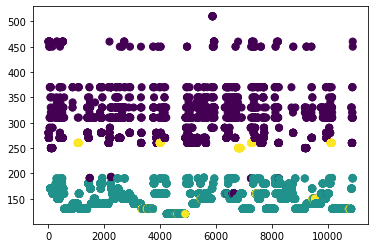

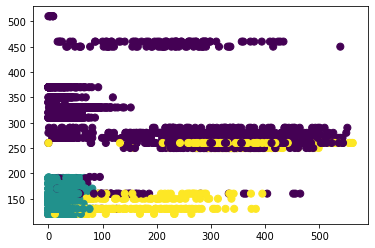

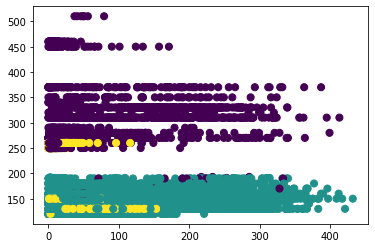

In [13]:
gmm = GaussianMixture(n_components=3).fit(X)
labels = gmm.predict(X)

# plt.scatter(X_train, y_train, s=50);

plt.figure(1)
plt.scatter(X_r_train, y_clust_train, c=labels, s=50, cmap='viridis');
plt.figure(2)
plt.scatter(X_c_train, y_clust_train, c=labels, s=50, cmap='viridis');
plt.figure(3)
plt.scatter(X_l_train, y_clust_train, c=labels, s=50, cmap='viridis');

## 3.2. Using KMeans

In [44]:
def elbow_met(df):
    from scipy.spatial.distance import cdist
    # k means determine k
    distortions = []
    K = range(1,10)
    for k in K:
        kmeanModel = KMeans(n_clusters=k).fit(df)
        kmeanModel.fit(df)
        distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])

    # Plot the elbow
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Within groups sum of squares')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

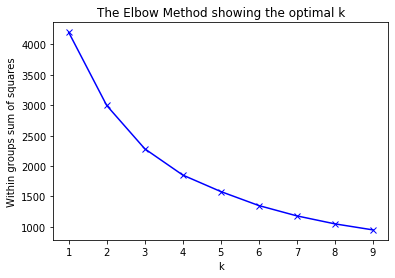

In [45]:
elbow_met(X)

In [14]:
kmeans = KMeans(n_clusters=3).fit(X) # TODO - number of clusters?
centroids = kmeans.cluster_centers_
# print(centroids)

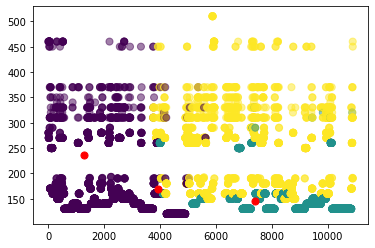

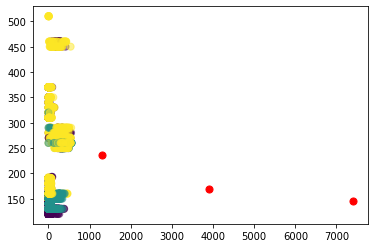

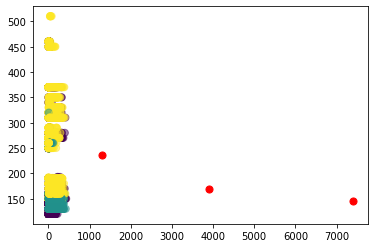

In [16]:
plt.figure(1)
plt.scatter(X_r_train, y_clust_train, c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, -1], c='red', s=50)

plt.figure(2)
plt.scatter(X_c_train, y_clust_train, c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, -1], c='red', s=50)

plt.figure(3)
plt.scatter(X_l_train, y_clust_train, c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, -1], c='red', s=50)

plt.show()

# 4) Random Forest

In [185]:
X_4_train = X[:, 3:9] # נתוני ישוב וקלפי + מספר מצביעים ומספר קולות פסולים
y_4_train = X[:, 10] #.ravel() # reshape from (n,1) to (n,) # 

# Only locality without Calpi
# X_4_train = X[:, [2, 4, 5]] # נתוני ישוב + מספר קולות 
# y_4_train = X[:, 6] #.ravel() # reshape from (n,1) to (n,) # מס קולות כשרים

y_4_train = y_4_train.astype('int')
# y_4_train = y_4_train.reshape(-1, 1)

print("X_4_train: \n", X_4_train.shape, X_4_train)
print("y_4_train: \n", y_4_train.shape, y_4_train)

X_4_train: 
 (10901, 6) [[967 1.0 1 0 559 113]
 [967 2.0 1 0 751 224]
 [967 3.0 1 0 651 205]
 ...
 [970 1.0 1 0 511 33]
 [1346 1.0 1 0 574 210]
 [778 1.0 1 0 565 452]]
y_4_train: 
 (10901,) [111 223 199 ...  33 205 452]


In [187]:
# חיפה, איילת השחר, אילת, סכנין וקצרין
df_23_filtered = df_23.loc[df_23['שם ישוב'].isin(['קצרין', 'סחנין', 'אילת', 'איילת השחר', 'חיפה'])] 
# print(df_23_filtered)
X_23_filtered = df_23_filtered.values #.drop(['שם ישוב'], axis=1).values

X_4_test = X_23_filtered[:, 3:9] #.reshape(-1, 1) # סמל ישוב
y_4_test = X_23_filtered[:, 10] # קולות כשרים

# Only locality without Calpi
# X_4_test = X_23_filtered[:, [2, 4, 5]] #.reshape(-1, 1) # סמל ישוב
# y_4_test = X_23_filtered[:, 6] # 

print("X_4_test: ",  X_4_test.shape, "\n", X_4_test)
print("y_4_test: ",  y_4_test.shape, y_4_test)

X_4_test:  (534, 6) 
 [[77 1.0 1 0 350 255]
 [77 2.0 1 0 468 332]
 [2600 1.0 9 0 459 181]
 ...
 [4100 8.0 1 0 643 345]
 [4100 9.0 1 0 769 513]
 [4100 10.0 1 0 554 340]]
y_4_test:  (534,) [255 330 180 219 238 230 220 182 245 218 309 290 219 213 188 216 187 168
 201 279 76 55 174 105 229 157 330 290 347 308 291 342 366 357 317 239 360
 235 226 242 282 336 279 321 259 245 219 236 189 207 192 386 168 220 229
 308 284 339 135 168 149 206 410 391 373 328 419 248 429 291 373 357 335
 362 340 293 347 382 252 271 483 444 482 171 450 239 133 128 388 331 258
 289 382 234 341 348 327 328 349 324 271 258 224 328 331 274 262 357 212
 288 322 259 159 229 235 169 272 231 291 281 264 227 273 277 255 218 266
 160 133 207 274 237 221 168 150 308 235 242 185 354 226 254 393 425 428
 423 450 342 380 268 650 224 317 227 351 348 335 226 280 290 224 208 224
 405 386 330 334 336 346 284 301 228 352 259 346 456 340 272 355 339 332
 420 286 325 276 257 347 348 273 264 270 237 310 344 245 333 355 318 394
 275 267

In [188]:
# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 150, 200, 250],#The number of trees in the forest.
    'max_depth': [None, 50, 60, 70] ,#The maximum depth of the tree.
    'max_features': ['sqrt', None],#he number of features to consider when looking for the best split
    'min_samples_split': [2, 5, 10],#The minimum number of samples required to split an internal node
    'bootstrap': [True, False]#Whether bootstrap samples are used when building trees.
}

# Estimator for use in random search
estimator = RandomForestRegressor(random_state = RSEED) #RandomForestClassifier

# Create the random search model
# rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
#                         scoring = 'accuracy', cv = 5, 
#                         n_iter = 1, verbose = 1, random_state=RSEED)
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, cv = 5, 
                        n_iter = 1, verbose = 1, random_state=RSEED)

# Create Decision Tree classifier with best parameters
# gs = GridSearchCV(estimator, param_grid, cv=10, scoring='accuracy')


# Fit 
rs.fit(X_4_train, y_4_train)

rs.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.8s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.0s finished


{'n_estimators': 100,
 'min_samples_split': 10,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}

In [189]:
best_model = rs.best_estimator_

# train_rf_predictions = best_model.predict(X_4_train)
# train_rf_probs = best_model.predict_proba(X_4_train)[:, 1]
# print("train_rf_predictions", train_rf_predictions.shape, train_rf_predictions)
# print("train_rf_probs", train_rf_probs.shape, train_rf_probs)

#TODO
rf_predictions = best_model.predict(X_4_test)
# rf_probs = best_model.predict_proba(X_4_test)[:, 1]
print("rf_predictions", rf_predictions.shape, rf_predictions)
# print("rf_probs", rf_probs.shape, rf_probs)

print('Mean Squared Error:', metrics.mean_squared_error(y_4_test, rf_predictions))

rf_predictions (534,) [251.24805159 333.64369444 182.21959524 212.83286905 229.56453175
 225.88756746 221.31824603 180.9822381  240.58234524 210.24824603
 307.69371032 295.25689286 217.33429365 213.27567857 188.50205952
 214.53444444 188.64844841 171.04349603 207.38011111 276.74737698
 100.73327381 102.10823016 174.05002381 114.66669444 227.86435317
 166.40470238 324.31466667 290.73619048 347.03994841 303.5161746
 294.45765873 340.57737302 367.90253571 355.47708333 314.5465119
 238.16892063 358.77678571 231.09085714 226.81995635 239.2371627
 284.16314286 336.8155119  280.26931349 320.1353373  254.74713492
 242.33586111 223.31679762 234.64694048 200.30513095 217.51576984
 192.17635714 383.54210317 173.87394841 218.22051984 226.35069841
 303.21240476 279.96537302 338.37285714 158.97013095 172.87527778
 158.39186111 204.83366667 407.33523016 392.32646429 371.65111905
 324.91462698 416.65373413 242.97415079 429.17948413 286.38101587
 370.03305556 355.0390754  331.5225119  358.48696032 342.

In [219]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

In [164]:
cm = confusion_matrix(y_4_train, rf_predictions) #TODO test not train
plot_confusion_matrix(cm, classes = ['Disqualified Votes', 'Qualified Votes'],
                      title = 'Qualified Votes Confusion Matrix')

NameError: name 'rf_predictions' is not defined

# 5) ADABOST

In [26]:
adb = AdaBoostClassifier()

# adb_param_grid = {'n_estimators':[50,100,150,200,250], #Number of weak learners to train iteratively., 
#                   'learning_rate':[0.001, 0.01, 0.1, 1], #It contributes to the weights of weak learners. It uses 1 as a default value.,
#                   'random_state': [1]}

adb_param_grid = {'n_estimators':[50], #Number of weak learners to train iteratively., 
                  'learning_rate':[0.1, 1], #It contributes to the weights of weak learners. It uses 1 as a default value.,
                  'random_state': [1]}

# gsADB = GridSearchCV(adb,param_grid = adb_param_grid, cv=5, scoring="accuracy", n_jobs= -1)
gsADB = GridSearchCV(adb,param_grid = adb_param_grid, cv=5, n_jobs= -1)

gsADB.fit(X_5_train,y_5_train)

ADB_best = gsADB.best_estimator_


print("Best Parameters:\n", gsADB.best_params_)

C:\Users\MuhammadZbeedat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\MuhammadZbeedat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters:
 {'learning_rate': 0.1, 'n_estimators': 50, 'random_state': 1}


In [193]:

df_23_filtered = df_23.loc[df_23['שם ישוב'].isin(['ירושלים', 'סכנין', 'בני ברק', 'דאלית אל כרמל', 'כרמיאל'])]

X_23_filtered = df_23_filtered.values #.drop(['שם ישוב'], axis=1).values
X_23_filtered = np.delete(X_23_filtered,[2],1) # drop Locality name column
print(X_23_filtered.shape, X_23_filtered)


# Only locality without kalpi
# df_c_23_filtered = df_c_23.loc[df_c_23['שם ישוב'].isin(['ירושלים', 'סחנין', 'בני ברק', 'דאלית אל כרמל', 'כרמיאל'])]
# X_c_23 = df_c_23_filtered.values #.drop(['שם ישוב'], axis=1).values
# X_c_23 = np.delete(X_23,[1],1) # drop Locality name column

# print("\n\n", X_c_23.shape, X_c_23)

(914, 40) [[15 7264 6100 ... 0 0 84]
 [15 7265 6100 ... 0 0 128]
 [15 7266 6100 ... 0 0 88]
 ...
 [6 2487 1139 ... 0 0 17]
 [6 2488 1139 ... 1 0 8]
 [6 2489 1139 ... 0 0 18]]


 (914, 39) [[15 6100 1.1 ... 0 0 84]
 [15 6100 1.2 ... 0 0 128]
 [15 6100 1.3 ... 0 0 88]
 ...
 [6 1139 67.0 ... 0 0 17]
 [6 1139 68.0 ... 1 0 8]
 [6 1139 69.0 ... 0 0 18]]


## Likud votes

In [190]:
X_Likud_train = np.delete(X[:, 3:],[28],1) # Without Likud data
y_Likud_train = X[:, [28]] # Likud votes              

y_Likud_train = y_Likud_train.astype('int')

print("X_Likud_train: \n", X_Likud_train.shape, X_Likud_train)
print("y_Likud_train: \n", y_Likud_train.shape, y_Likud_train)

X_Likud_train: 
 (10901, 39) [[967 1.0 1 ... 0 0 0]
 [967 2.0 1 ... 0 0 0]
 [967 3.0 1 ... 0 0 0]
 ...
 [970 1.0 1 ... 0 0 0]
 [1346 1.0 1 ... 0 1 2]
 [778 1.0 1 ... 0 0 48]]
y_Likud_train: 
 (10901, 1) [[  0]
 [  2]
 [  1]
 ...
 [  2]
 [ 63]
 [202]]


In [101]:
adb_Likud = AdaBoostClassifier(ADB_best)
adb_Likud.fit(X_Likud_train,y_Likud_train)

adb_Likud.feature_importances_

C:\Users\MuhammadZbeedat\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0044, 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.9956, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ])

In [194]:
# X_23_filtered[:, [3, 4, 5, 6, 7, 9, 10]] #.reshape(-1, 1)
X_Likud_test = np.delete(X_23_filtered,[28],1) # Without Likud data  
y_Likud_test = X_23_filtered[:, 28] # Likud votes

print("X_Likud_test: ",  X_Likud_test.shape, "\n", X_Likud_test)
print("y_Likud_test: ",  y_Likud_test.shape, y_Likud_test)

X_Likud_test:  (914, 39) 
 [[15 7264 6100 ... 0 0 84]
 [15 7265 6100 ... 0 0 128]
 [15 7266 6100 ... 0 0 88]
 ...
 [6 2487 1139 ... 0 0 17]
 [6 2488 1139 ... 1 0 8]
 [6 2489 1139 ... 0 0 18]]
y_Likud_test:  (914,) [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0

In [195]:
y_pred=adb_Likud.predict(X_Likud_test)

print('Mean Squared Error:', metrics.mean_squared_error(y_Likud_test, y_pred))

print("Predicted values: ", y_pred)

Mean Squared Error: 723.9442013129103
Predicted values:  [ 13  15  24   5   9   0   3   0   4   9   6  12   0   2   2   0   0   3
   5   9  15  37  22  15  15  37  22  23   7  12   0   2   0   5   0   0
   5   0   4   0   7   9   0   9   0   0   0   0   0   0   0   6   0   0
   2   0   0   0   0   0   0   3   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   6   2   3   0   5   4   5   0   0   0   0
   0   0   0   0   0   0   0   0   9   7   0   0   0   0   0   0   0   0
   4   0   0   0   0   0   0   0   0   0   2   9   0   0   0   0   0   0
  13   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2   0
   0   0   0   0   0   0   2   0   0   0   4   0  12   6   6   3  37  12
  12   6   6   9  37  37  37  22  44  37  22  22   9  15  37  37  44  37
  48  47  22   0  22  22  22  56  44  63  22  22  44  37  47  37  37  44
  37  37   9  12  15  37   0   0   0   3   0   0   0   0   0   0   

## Arabs Common List votes

In [ ]:
X_ArabList_train = np.delete(X[:, 3:],[13],1) # Without ArabicCommonList data
y_ArabList_train = X[:, [13]] # ArabicCommonList votes              

y_ArabList_train = y_ArabList_train.astype('int')

print("X_ArabList_train: \n", X_ArabList_train.shape, X_ArabList_train)
print("y_ArabList_train: \n", y_ArabList_train.shape, y_ArabList_train)

In [ ]:
adb_ArabList = AdaBoostClassifier(ADB_best)
adb_ArabList.fit(X_ArabList_train,y_ArabList_train)

adb_ArabList.feature_importances_

In [ ]:
X_ArabList_test = np.delete(X_23_filtered[:, 3:],[28],1) # Without Likud data  
y_ArabList_test = X_23_filtered[:, 28] # Likud votes

print("X_ArabList_test: ",  X_ArabList_test.shape, "\n", X_ArabList_test)
print("y_ArabList_test: ",  y_ArabList_test.shape, y_ArabList_test)

In [ ]:
y_pred=adb_ArabList.predict(X_ArabList_test)
print('Mean Squared Error:', metrics.mean_squared_error(y_ArabList_test, y_pred))

## Blue and White votes

In [ ]:
X_BlueWhite_train = np.delete(X[:, 3:],[33],1) # Without BlueWhite data
y_BlueWhite_train = X[:, [33]] # BlueWhite votes              

y_BlueWhite_train = y_BlueWhite_train.astype('int')

print("X_BlueWhite_train: \n", X_BlueWhite_train.shape, X_BlueWhite_train)
print("y_BlueWhite_train: \n", y_BlueWhite_train.shape, y_BlueWhite_train)

In [ ]:
adb_BlueWhite = AdaBoostClassifier(ADB_best)
adb_BlueWhite.fit(X_BlueWhite_train,y_BlueWhite_train)

adb_BlueWhite.feature_importances_

In [ ]:
X_BlueWhite_test = np.delete(X_23_filtered[:, 3:],[28],1) # Without Likud data  
y_BlueWhite_test = X_23_filtered[:, 28] # Likud votes

print("X_BlueWhite_test: ",  X_BlueWhite_test.shape, "\n", X_BlueWhite_test)
print("y_BlueWhite_test: ",  y_BlueWhite_test.shape, y_BlueWhite_test)

In [ ]:
y_pred=adb_ArabList.predict(X_BlueWhite_test)
print('Mean Squared Error:', metrics.mean_squared_error(y_BlueWhite_test, y_pred))

# 6) Predict where to locate supervisors

In [243]:
X_6_train = X[:, [3, 4, 5, 6, 7, 8, 10]] # 
y_6_train = X[:, 9] #.ravel() # reshape from (n,1) to (n,) # 

y_6_train = y_6_train.astype('int')

print("X_6_train: \n", X_6_train.shape, "\n",  X_6_train)
print("y_6_train: \n", y_6_train.shape, "\n", y_6_train)

X_6_train: 
 (10901, 7) 
 [[967 1.0 1 ... 559 113 111]
 [967 2.0 1 ... 751 224 223]
 [967 3.0 1 ... 651 205 199]
 ...
 [970 1.0 1 ... 511 33 33]
 [1346 1.0 1 ... 574 210 205]
 [778 1.0 1 ... 565 452 452]]
y_6_train: 
 (10901,) 
 [2 1 6 ... 0 5 0]


In [213]:

X_6_test = X_23[:, [2, 3, 4, 5, 6, 7, 9]] #.reshape(-1, 1) 
y_6_test = X_23[:, 8] # קולות פסולים


print("X_6_test: \n",  X_6_test.shape, "\n", X_6_test)
print("\ny_6_test: \n",  y_6_test.shape, "\n", y_6_test)

X_6_test: 
 (11179, 7) 
 [[967 1.0 1 ... 585 126 124]
 [967 2.0 1 ... 764 249 247]
 [967 3.0 1 ... 669 220 218]
 ...
 [970 1.0 1 ... 520 48 48]
 [1346 1.0 1 ... 587 206 206]
 [778 1.0 1 ... 576 472 471]]

y_6_test: 
 (11179,) 
 [2 2 2 ... 0 0 1]


In [209]:
# Fit using Regressor RandomForest (from section #4)
rs.fit(X_6_train, y_6_train)

rs.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.6s finished


{'n_estimators': 100,
 'min_samples_split': 10,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}

In [210]:
best_model = rs.best_estimator_

rf_predictions = best_model.predict(X_6_test)
# rf_probs = best_model.predict_proba(X_6_test)[:, 1]
print("rf_predictions", rf_predictions.shape, rf_predictions)
# print("rf_probs", rf_probs.shape, rf_probs)

print('Mean Squared Error:', metrics.mean_squared_error(y_6_test, rf_predictions))

rf_predictions (11179,) [2.0984127  2.77795238 3.19962302 ... 0.86030159 4.31155952 0.80887698]
Mean Squared Error: 3.7796552843125113


In [244]:
THRESHOLD = 4 # number of disqualified votes

train_labels = y_6_train > THRESHOLD
print(train_labels)

test_labels = rf_predictions > THRESHOLD
print(test_labels)

[False False  True ... False  True False]
[False False False ... False False False]


In [247]:
# Estimator for use in random search
estimator = RandomForestClassifier(random_state = RSEED)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'accuracy', cv = 5, 
                        n_iter = 1, verbose = 1, random_state=RSEED)


# Fit 
rs.fit(X_6_train, train_labels)
rs.best_params_

best_model = rs.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.3s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.4s finished


Predictions:  [False False False ... False  True False]
Accuracy: 0.9429287056087307
Confusion matrix, without normalization
[[10541   638]
 [    0     0]]


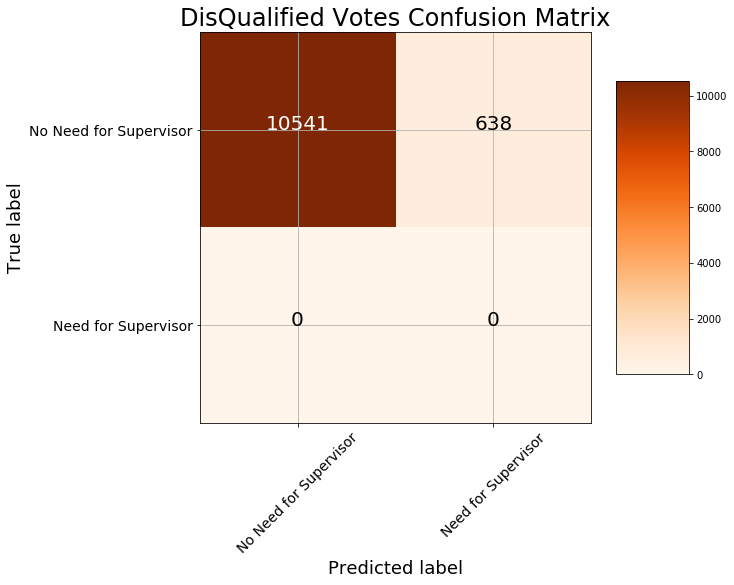

In [248]:
rf_predictions = best_model.predict(X_6_test)
rf_probs = best_model.predict_proba(X_6_test)[:, 1]
print("Predictions: ", rf_predictions)
print('Accuracy:', metrics.accuracy_score(test_labels, rf_predictions))

cm = confusion_matrix(test_labels, rf_predictions)

plot_confusion_matrix(cm, classes = ['No Need for Supervisor', 'Need a Supervisor'],
                      title = 'DisQualified Votes Confusion Matrix')